# Introduction

#### Dataset :

* Dataset pertama mengenai data asuransi
* Dataset kedua mengenai data galaxy

#### Sumber Dataset:

* dataset biaya asuransi menggunakan dataset berasl dari: https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv
* dataset data galaxy menggunakan dataset berasl dari: https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv

#### Objective yang ingin dicapai:

* memprediksi biaya asuransi
* mengklasifikasikan tipe galaksi

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Regression

# Data Loading

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Cleaning

In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### binning age

# Explorasi Data

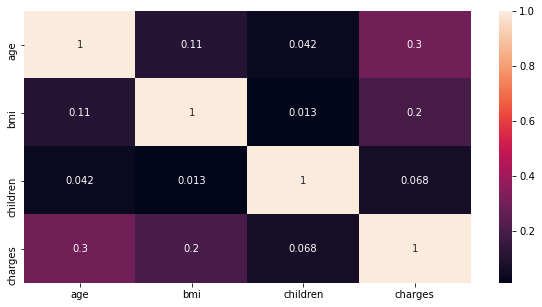

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True);

Dari visaualisasi terlihat bahwa variabel age memiliki relasi positif tertinggi dengan variabel charges yaitu 0.3

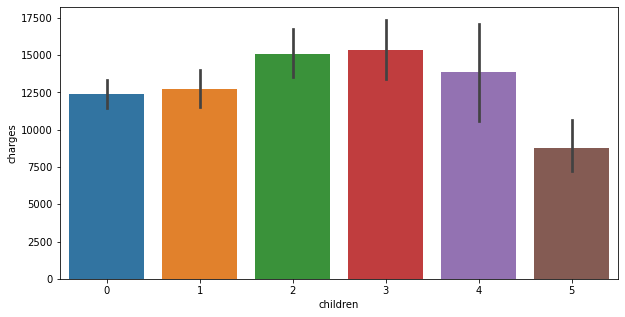

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='children', y='charges', data=data);

dari visualisasi terlihat bahwa konsumen yang memiliki jumlah anak 2, 3, dan 4 memiliki peluang membayar asuransi lebih besar

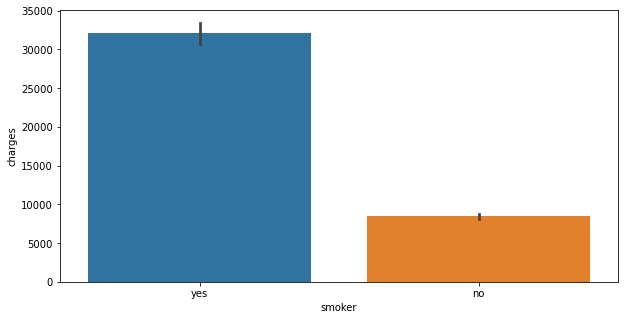

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='smoker', y='charges', data=data);

dari visualisasi terlihat bahwa konsumen perokok membayar biaya asuransi lebih tinggi dari bukan perokok

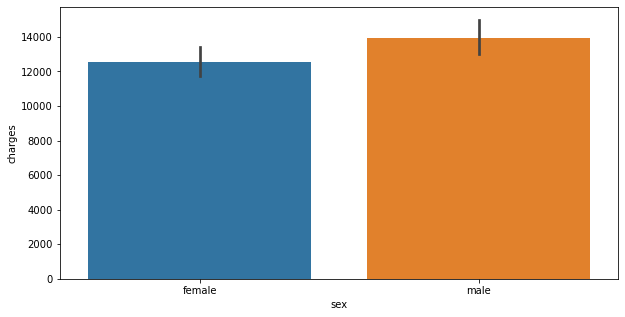

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='sex', y='charges', data=data);

dari visualisasi terlihat bahwa konsumen pria membayar biaya asuransi lebih tinggi dibandingkan konsumen wanita

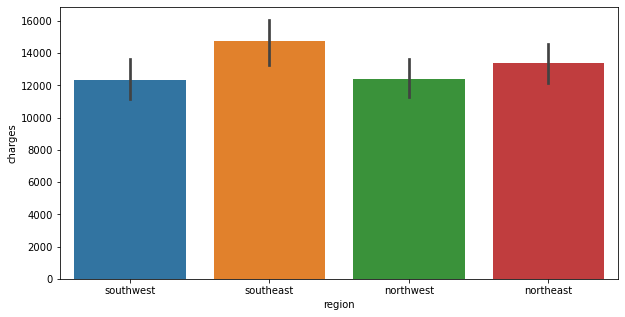

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='region', y='charges', data=data);

dari data visualisasi terlihat bahwa konsumen yang tinggal didaerah southeast membayar asuransi tertinggi dibandingkan daerah lainnya

# Data Preprocessing

#### Mengubah data categorical menjadi data numeric

In [13]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


mengubah data categorical pada variabel 'sex' , 'smoker' dan 'region' menjadi data numeric

#### Menentukan variabel independent (X) dan varibel dependent (y)

In [14]:
X = data.drop('charges', axis=1)
y = data['charges']

#### Import Pustaka

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Split Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

melakukan split data training sebesar 0.7 dan data test 0.3

#### Melakukan Regularisasi data 

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

# Pendefinisian dan Pelatihan Model

In [18]:
linear_model = LinearRegression(fit_intercept=True)

%time linear_model.fit(X_train_trf, y_train)

Pemilihan Model Regression disebabkan karena objective yang ingin dicapai adalah melakukan prediksi terhadap biaya asuransi

# Evaluasi Model

#### Import Pustaka 

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
%time y_preds = linear_model.predict(X_test_trf)

CPU times: user 502 µs, sys: 29 µs, total: 531 µs
Wall time: 574 µs


In [22]:
linear_model.score(X_test_trf, y_test)

0.7696118054369009

In [23]:
linear_model.score(X_train_trf, y_train)

0.742398009060026

#### Regression metrics

In [24]:
R2_Score = r2_score(y_test, y_preds)
MAE = mean_absolute_error(y_test, y_preds)
MSE = mean_squared_error(y_test, y_preds)
RMSE = np.sqrt(mean_absolute_error(y_test, y_preds))

print('R2_score: ',R2_Score )
print('MAE: ', MAE )
print('MSE: ', MSE )
print('RMSE: ', RMSE )

R2_score:  0.7696118054369009
MAE:  4145.4505556276
MSE:  33780509.57479167
RMSE:  64.385173414596


#### Visualisasi

In [25]:
y_preds_linear = linear_model.predict(X)

In [26]:
data['predicted'] = y_preds_linear

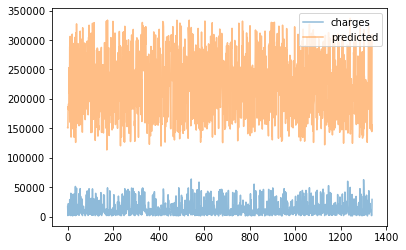

In [27]:
data[['charges','predicted']].plot(alpha=0.5);

# Model Inference

#### Menggunakan data baru

In [29]:
dummies = [[45, 35.175, 2, 0, 0, 0, 0, 0]]

#### melakukan prediksi dengan menggunakan data X_test

In [30]:
linear_model = LinearRegression(fit_intercept=True)
%time linear_model.fit(X_train_trf, y_train)

prediction = linear_model.predict(dummies)
prediction

array([253944.2968763])

# Pengambilan Keputusan

In [31]:
params = pd.Series(linear_model.coef_, index=X.columns )
params

age                 3688.583190
bmi                 2090.997834
children             514.023604
sex_male              52.388681
smoker_yes          9595.868167
region_northwest    -209.325551
region_southeast    -426.262771
region_southwest    -394.014449
dtype: float64

In [32]:
analisis = pd.DataFrame(params.round(0), X.columns, columns=['Coefficients'])
analisis

,Coefficients
age,3689.0
bmi,2091.0
children,514.0
sex_male,52.0
smoker_yes,9596.0
region_northwest,-209.0
region_southeast,-426.0
region_southwest,-394.0


### Pengambilan keputusan berdasarkan dari model analysis:

Pemilihan Model Regression disebabkan karena objective yang ingin dicapai adalah melakukan prediksi terhadap biaya asuransi

Dengan menggunakan model Linear Regression terdapat beberapa variabel yang memiliki relasi positif terhadap variabel charges, yaitu:

* Dengan memegang fitur lain tetap, peningkatan rata-rata 1 unit variabel age akan dikaitkan dengan peningkatan total 3689 variabel charges 

* Dengan memegang fitur lain tetap, peningkatan rata-rata 1 unit variabel bmi akan dikaitkan dengan peningkatan total 2091.0 variabel charges 

* Dengan memegang fitur lain tetap, peningkatan rata-rata 1 unit variabel children akan dikaitkan dengan peningkatan total 514 variabel charges 

* Dengan memegang fitur lain tetap, peningkatan rata-rata 1 unit variabel sex_male akan dikaitkan dengan peningkatan total 52 variabel charges 

* Dengan memegang fitur lain tetap, peningkatan rata-rata 1 unit variabel smoker_yes akan dikaitkan dengan peningkatan total 9596 variabel charges 


Dengan menggunakan model Linear Regression diperoleh score:
* MAE:  4145.4505556276
* MSE:  33780509.57479167
* RMSE:  64.385173414596

-------------------------------------------------------------------------------------------------------------------

# Classification

# Data Loading

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv')

In [34]:
df.head()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1


In [35]:
df.tail()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
19995,19995,4.631655,29.018608,0.358020,0.602471,0.832848,1.611594,0.735315,1
19996,19996,-2.179893,15.245582,0.470026,0.842624,0.868289,1.313089,0.649996,1
19997,19997,1.876151,6.907812,0.323334,0.830340,0.950820,1.406042,0.671217,1
19998,19998,5.053256,27.981613,0.393574,0.632766,0.825990,1.659363,0.379448,1
19999,19999,-0.558501,6.557439,0.346322,0.878231,0.882251,1.616493,0.738060,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20000 non-null  int64  
 1   TType                20000 non-null  float64
 2   K                    20000 non-null  float64
 3   C                    20000 non-null  float64
 4   A                    20000 non-null  float64
 5   S                    20000 non-null  float64
 6   G2                   20000 non-null  float64
 7   H                    20000 non-null  float64
 8   CNN2classes1stClass  20000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [37]:
df.describe()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,0.395287,18.708788,-1846.175115,0.323992,-3.220560,0.747130,0.655137,0.807200
std,5773.647028,2.432726,26.185899,3880.385347,70.716614,199.980672,70.720857,0.113237,0.394507
min,0.000000,-2.913205,1.471492,-9999.999999,-9999.999999,-9999.999999,-9999.999999,0.017008,0.000000
25%,4999.750000,-1.952929,7.039827,0.292831,0.782718,0.757618,0.979765,0.585356,1.000000
50%,9999.500000,-0.071197,11.781205,0.365902,0.859172,0.844121,1.364905,0.659603,1.000000
75%,14999.250000,2.376115,20.920884,0.437227,0.905404,0.889421,1.606039,0.743029,1.000000
max,19999.000000,7.773612,1035.467764,0.761184,0.986535,0.979032,1.953389,0.929947,1.000000


In [38]:
df.shape

(20000, 9)

In [39]:
df.columns

Index(['Unnamed: 0', 'TType', 'K', 'C', 'A', 'S', 'G2', 'H',
       'CNN2classes1stClass'],
      dtype='object')

In [40]:
df['CNN2classes1stClass'].unique()

array([1, 0])

# Data Cleaning

In [41]:
col_to_use = ['C', 'A', 'S', 'G2', 'H','CNN2classes1stClass']

In [42]:
df = df[col_to_use]
df.head()

,C,A,S,G2,H,CNN2classes1stClass
0,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,0.446453,0.839216,0.801140,1.107665,0.610453,1


In [43]:
df.isna().sum()

C                      0
A                      0
S                      0
G2                     0
H                      0
CNN2classes1stClass    0
dtype: int64

# Explorasi Data

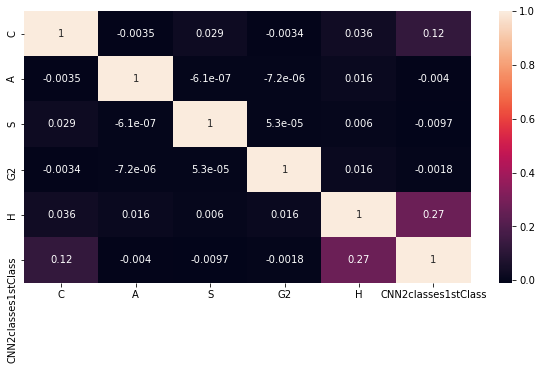

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True);

dari visualisasi terlihat bahwa variabel H memiliki korelasi positif dengan variabel CNN2classes1stClass yaitu 0.27

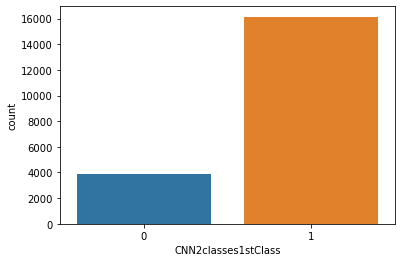

In [45]:
sns.countplot(x='CNN2classes1stClass', data=df);

dari visualisasi terlihat bahwa jumlah galaksi spriral lebih banyak dibandingkan galaksi elips

# Data Preprocessing

#### Menentukan variabel independent (X) dan varibel dependent (y)

In [46]:
X = df.drop('CNN2classes1stClass', axis=1)
y = df['CNN2classes1stClass']

#### Import pustaka

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Split Data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### Regularisasi Data

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

# Pendefinisian Model

In [50]:
model_svc_rbf = SVC(kernel='rbf', random_state=42, C=1)

# Pelatihan Model

In [51]:
%time model_svc_rbf.fit(X_train_trf, y_train)

CPU times: user 16.6 s, sys: 466 ms, total: 17.1 s
Wall time: 20.9 s


SVC(C=1, random_state=42)

# Evaluasi Model

#### Import pustaka

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

#### Evaluation Classification Metrics SVM RBF

In [53]:
%time y_preds_rbf = model_svc_rbf.predict(X_test_trf)

CPU times: user 8.55 s, sys: 82 ms, total: 8.63 s
Wall time: 9.63 s


In [54]:
print("Classification Report: \n", classification_report(y_test, y_preds_rbf))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1138
           1       0.81      1.00      0.90      4862

    accuracy                           0.81      6000
   macro avg       0.41      0.50      0.45      6000
weighted avg       0.66      0.81      0.73      6000



/Users/dody/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ROC Curve

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)  

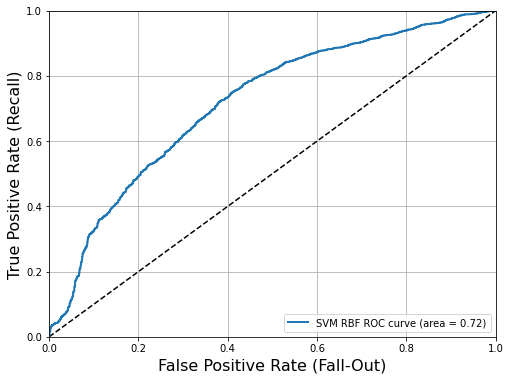

In [56]:
plt.figure(figsize=(8, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') 
labels=['SVM RBF']
for idx,model in enumerate([model_svc_rbf]):
    y_scores = model.decision_function(X_test_trf)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

# Model Inference

#### Menggunakan data baru

In [58]:
dummies = [[0.0, 0.0, 0.7, 0.94, 0.56]]

In [60]:
model_svc_rbf = SVC(kernel='rbf', random_state=42, C=1)
%time model_svc_rbf.fit(X_train_trf, y_train)

predictions = model_svc_rbf.predict(dummies)
predictions

CPU times: user 16.3 s, sys: 386 ms, total: 16.7 s
Wall time: 19 s


array([1])

# Pengambilan Keputusan

Pemilihan Model Classification disebabkan karena objective yang ingin dicapai adalah melakukan klasifikasi terhadap tipe galaksi

Dari visualisasi terlihat bahwa jumlah galaksi spriral lebih banyak dibandingkan galaksi elips

Dengan menggunakan model SVM dengan kernel 'rbf' diperoleh score:
* accureacy:  0.81
* ROC curve:  0.72